In [155]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix


# Video Game Sales
This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

Fields include

* `Rank` - Ranking of overall sales

* `Name` - The games name

* `Platform` - Platform of the games release (i.e. PC,PS4, etc.)

* `Year` - Year of the game's release

* `Genre` - Genre of the game

* `Publisher` - Publisher of the game

* `NA_Sales` - Sales in North America (in millions)

* `EU_Sales` - Sales in Europe (in millions)

* `JP_Sales` - Sales in Japan (in millions)

* `Other_Sales` - Sales in the rest of the world (in millions)

* `Global_Sales` - Total worldwide sales.

Задача: предсказать признак `Genre` по остальным признакам.

### Загрузка данных

In [156]:
data = pd.read_csv('./vgsales.csv')
data.shape

(16598, 11)

In [157]:
data.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### Визуализация данных. Основные характеристики. Интерпретация.

In [159]:
data.describe()


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Для каждого количественного признака приведены средние значения, стандартное отклонение, минимальное и макимальное значения, медиана и значения квартилей. Что средние значения больше медианы, значит эти признаки примают чаще меньшие значения, чем большие.

Матрица корреляции:

In [160]:
data.corr()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.178814,-0.401362,-0.379123,-0.267785,-0.332986,-0.427407
Year,0.178814,1.000000,-0.091402,0.006014,-0.169316,0.041058,-0.074735
NA_Sales,-0.401362,-0.091402,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,-0.379123,0.006014,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,-0.267785,-0.169316,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,-0.332986,0.041058,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,-0.427407,-0.074735,0.941047,0.902836,0.611816,0.748331,1.000000


Матрица ковариации:

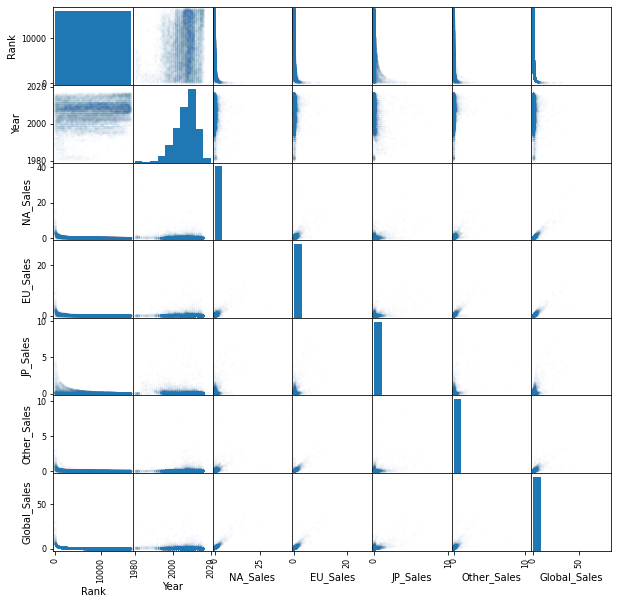

In [161]:
pd.plotting.scatter_matrix(data, alpha = .01, figsize = (10, 10))
pass

Зависимость для признаков Genre и Global_sales:

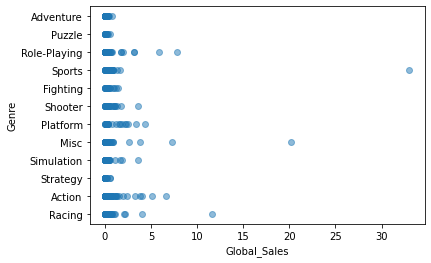

In [162]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data.shape[0]), size=500, replace=False)
plt.scatter(data.iloc[random_subset]['Global_Sales'], data.iloc[random_subset]['Genre'], alpha=0.5)
plt.xlabel('Global_Sales')
plt.ylabel('Genre')
pass

Action, Misc, Role-Playing наиболее продаваемые жанры

Проанализируем зависимость `Global_sales` от `Year` и от `Genre`. Построим диаграмму рассеивания.

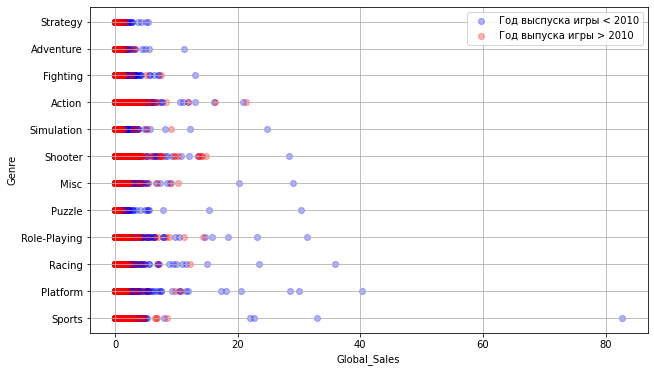

In [163]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['Year'] < 2010]['Global_Sales'],
            data[data['Year'] < 2010]['Genre'],
            alpha = 0.3,
            label = 'Год выспуска игры < 2010',
            color = 'b')

plt.scatter(data[data['Year'] > 2010]['Global_Sales'],
            data[data['Year'] > 2010]['Genre'],
            alpha = 0.3,
            label = 'Год выпуска игры > 2010',
            color = 'r')

plt.xlabel('Global_Sales')
plt.ylabel('Genre')
plt.legend()
plt.grid()

Наибольшую стоимость имеют игры с более поздним годом выпуска(2010 и ранее), возможно, это обусловлено тем, что такого рода игры уже становятся эксклюзивом и их практически невозможно найти на рынке.

### Обработка пропущенных значений

Найдём медиану по каждому признаку:

In [164]:
data.median(axis = 0)

C:\Users\User\AppData\Local\Temp/ipykernel_12804/413672352.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.median(axis = 0)


Rank            8300.50
Year            2007.00
NA_Sales           0.08
EU_Sales           0.02
JP_Sales           0.00
Other_Sales        0.01
Global_Sales       0.17
dtype: float64

In [165]:
numerical_columns = data.select_dtypes(include=np.number).columns
data[numerical_columns].count(axis = 0)

Rank            16598
Year            16327
NA_Sales        16598
EU_Sales        16598
JP_Sales        16598
Other_Sales     16598
Global_Sales    16598
dtype: int64

В столбце `Year` отсутствуют значения. Заменим их на медианы

In [166]:
data = data.fillna(data.median(axis = 0), axis = 0)
data[numerical_columns].count(axis = 0)

C:\Users\User\AppData\Local\Temp/ipykernel_12804/687271444.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.median(axis = 0), axis = 0)


Rank            16598
Year            16598
NA_Sales        16598
EU_Sales        16598
JP_Sales        16598
Other_Sales     16598
Global_Sales    16598
dtype: int64

### Обработка категориальных признаков

Столбцы `Name`, `Platform`,  `Genre`, `Publisher` содержат категориальные значения и имеют тип object. Заменим тип на специальный, предназначенный для хранения категориальных значений, кроме столбца `Name`, который можно удалить:

In [167]:
data['Platform'] = data['Platform'].astype('category')
data['Publisher'] = data['Publisher'].astype('category')
data['Genre'] = data['Genre'].astype('category')

### Нормализация

В случае когда входные данные нормализованы, алгоритмы машинного обучения будут работать качественнее. Приведя данные к нулевому среднему значению с единичным квадратичным отклонением, мы получим отмасштабированные данные.

In [168]:
X = data.drop('Genre', axis = 1)
y = data['Genre']
print("x:", X.shape)
print("y:", y.shape)

x: (16598, 10)
y: (16598,)


In [169]:
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [170]:
X1 = X.drop('Name', axis = 1)
X2 = X1.drop('Platform', axis = 1)
proc_data = X2.drop('Publisher', axis = 1)
proc_data

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,2006.0,41.49,29.02,3.77,8.46,82.74
1,2,1985.0,29.08,3.58,6.81,0.77,40.24
2,3,2008.0,15.85,12.88,3.79,3.31,35.82
3,4,2009.0,15.75,11.01,3.28,2.96,33.00
4,5,1996.0,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...
16593,16596,2002.0,0.01,0.00,0.00,0.00,0.01
16594,16597,2003.0,0.01,0.00,0.00,0.00,0.01
16595,16598,2008.0,0.00,0.00,0.00,0.00,0.01
16596,16599,2010.0,0.00,0.01,0.00,0.00,0.01


In [171]:
proc_data = (proc_data - proc_data.mean(axis = 0))/proc_data.std(axis = 0)
proc_data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,1.659800e+04,1.659800e+04,1.659800e+04,1.659800e+04,1.659800e+04,1.659800e+04,1.659800e+04
mean,9.589202e-17,1.755166e-16,-9.589202e-17,4.109658e-17,-5.051455e-17,-6.250105e-17,-3.938422e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.732024e+00,-4.568933e+00,-3.240761e-01,-2.901982e-01,-2.514840e-01,-2.548567e-01,-3.391840e-01
25%,-8.659186e-01,-5.908544e-01,-3.240761e-01,-2.901982e-01,-2.514840e-01,-2.548567e-01,-3.070303e-01
50%,-2.196512e-05,1.009853e-01,-2.261189e-01,-2.506217e-01,-2.514840e-01,-2.018312e-01,-2.362920e-01
75%,8.658746e-01,6.198651e-01,-3.020441e-02,-7.252779e-02,-1.221558e-01,-4.275459e-02,-4.336942e-02
max,1.731980e+00,2.349464e+00,5.047899e+01,5.713521e+01,3.279187e+01,5.579313e+01,5.286243e+01


### Метод kNN

In [172]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(proc_data, y, test_size = 0.30, random_state = 5)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

11618 4980


In [173]:
from sklearn.neighbors import KNeighborsClassifier
neighbors_array = np.array([1,11,21,31,41,51])
for i in range (6):
    knn = KNeighborsClassifier(n_neighbors = neighbors_array[i])
    knn.fit(X_train, y_train)
    print('neighbours =',neighbors_array[i],'train accuracy =',knn.score(X_train, y_train),'test accuracy =', knn.score(X_test, y_test))
    i+=1

neighbours = 1 train accuracy = 1.0 test accuracy = 0.1785140562248996
neighbours = 11 train accuracy = 0.3570321914270959 test accuracy = 0.2283132530120482
neighbours = 21 train accuracy = 0.31244620416594937 test accuracy = 0.2355421686746988
neighbours = 31 train accuracy = 0.2968669306248924 test accuracy = 0.23694779116465864
neighbours = 41 train accuracy = 0.28851781718023756 test accuracy = 0.23453815261044178
neighbours = 51 train accuracy = 0.2810294370803925 test accuracy = 0.24016064257028114


### Выводы:
kNN метод показывает самую высокую точность на обучаещей выборке для 1 соседа - 100%. При увеличении количества соседей, точность на обучающей выборке падает, а на тестовой самая высокая точность достигается при 51 соседях - 24%,увеличивается с увеличением количества соседей.

## Сокращение размерности

### Метод главных компонент (PCA)
Применим PCA для наших данных, оставляя 2 главных компонента. Построим Biplot, чтобы увидеть расположение точек на новой плоскости, а также проекции старых осей на эту плоскость.

[(0.4172642721768417, 'JP_Sales'), (0.42091056044876596, 'Rank'), (0.45737722934259084, 'NA_Sales'), (0.47454476758796005, 'Other_Sales'), (0.48607553426233846, 'EU_Sales'), (0.5007387432773206, 'Global_Sales'), (0.8528361195879612, 'Year')]


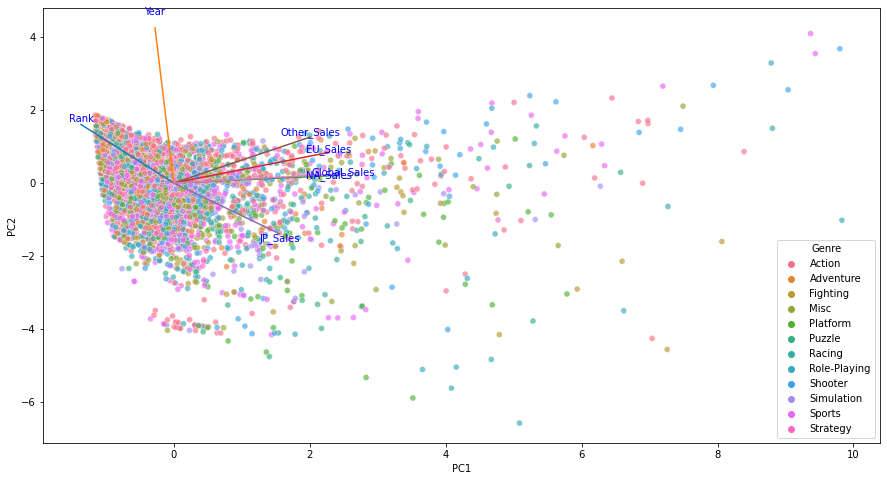

In [174]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
def Biplot(X,y, comp, labels):
    plt.figure(figsize=(15,8))
    draw = pd.concat([res, y], axis=1, join='inner')
    rows_to_drop = draw[(draw['PC1'] < draw['PC1'].quantile(0.005)) | (draw['PC1'] > draw['PC1'].quantile(0.995))].index
    draw = draw.drop(rows_to_drop)  
    np.random.seed(21)
    random_subset = np.random.choice(np.arange(draw.shape[0]), size=5000, replace=False)
    sns.scatterplot(data=draw.iloc[random_subset], x = 'PC1',y ='PC2',hue='Genre',alpha=0.65)
    length =[]
    for i in range(0,len(comp[0])):
        plt.text(comp[0,i]* 5,comp[1,i]  * 5.5, labels[i], color = 'b', ha = 'center', va = 'center')
        plt.plot([0,comp[0,i]*5],[0,comp[1,i]*5])
        length.append((np.sqrt(comp[0,i]**2 + comp[1,i]**2),labels[i]))
    print(sorted(length))
pca = PCA(n_components = 2)
res = pca.fit(proc_data).transform(proc_data)

res = pd.DataFrame(res,columns = ['PC1','PC2'])
Biplot(res,y,pca.components_,proc_data.columns)

### Линейный дискриминантый анализ (LDA)
Проделаем ту же операцию с методом LDA.

[(0.13450242297088563, 'Other_Sales'), (0.2098234249955285, 'Global_Sales'), (0.2421780565179027, 'JP_Sales'), (0.31213934865124604, 'EU_Sales'), (0.4406276925006693, 'Year'), (0.8710986824613663, 'Rank'), (1.1374583393564728, 'NA_Sales')]


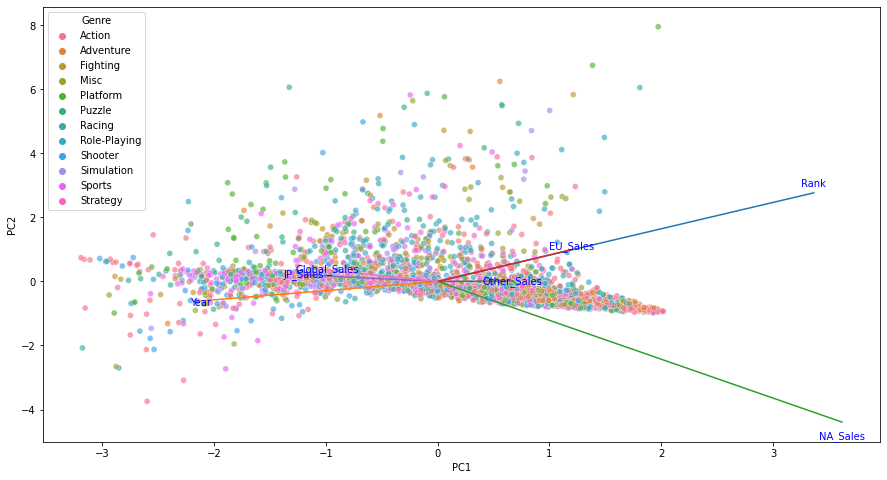

In [175]:
lda = LinearDiscriminantAnalysis(n_components = 2)
res = lda.fit_transform(proc_data,y.values.ravel())
res = pd.DataFrame(res,columns = ['PC1','PC2'])

X_tr, X_te, y_tr, y_te = train_test_split(res, y, test_size = 0.25, random_state = 23)

Biplot(res,y,lda.scalings_,proc_data.columns)

Из биплотов для PCA и LDA, а также длинам проекций старых осей можно сделать следующие выводы:

Проекции точек располагаются достаточно беспорядочно после обоих способов, ожидается существенное повышение ошибки предсказания.
PCA и LDA дают противоречивую информацию о важности признаков. В PCA считается наиболее важным год выпуска, а остальные более-менее одинаковы. В LDA намного важнее оценка игры и продажи в Северной Америке. Принимая во внимание оба результата, можно сказать, что год, оценка и продажи в Северной Америке более важны.
Наименее важные признаки выделить не удаётся.

 ## Выбор различного числа компонент (PCA)
 Будем постепенно увеличивать число главных компонент до максимального, каждый раз применяя лучший классификатор из предыдущих результатов, то есть kNN c 51 соседом.

In [176]:
errors = pd.DataFrame({'comp':[],'train_err':[],'test_err':[]})
for i in range(1,8):
    pca = PCA(n_components = i)
    res = pca.fit(proc_data).transform(proc_data)
    X_tr, X_te, y_tr, y_te = train_test_split(res, y, test_size = 0.25, random_state = 56)
    
    knn = KNeighborsClassifier(n_neighbors = 51)
    knn.fit(X_tr, y_tr.values.ravel())
    
    errors = errors.append({'comp':i,'train_err':1-knn.score(X_tr, y_tr),'test_err':1-knn.score(X_te, y_te)},ignore_index=True)
print(errors)

   comp  train_err  test_err
0   1.0   0.776109  0.823133
1   2.0   0.751526  0.774217
2   3.0   0.735781  0.769398
3   4.0   0.732166  0.765301
4   5.0   0.721562  0.759277
5   6.0   0.717224  0.752289
6   7.0   0.717224  0.752289


Построим график зависимости ошибок на тестовой и обучающей выборке, в зависимости от числа компонент:


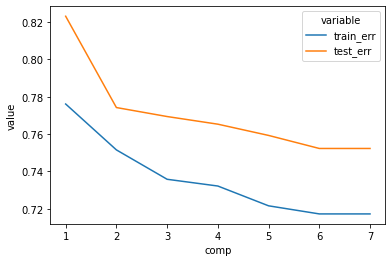

In [178]:
sns.lineplot(x='comp', y='value', hue='variable', data=pd.melt(errors, ['comp']))
pass

Здесь можно видеть, что при 6 и 7 компонентах ошибка одинакова, а при меньшем количестве она растёт. Это означает, что информационного шума, понижающего точность в датасете нет, и понижение размерности не помогает. После PCA мы теряем существенную информацию, то есть все признаки важны.

Выводы:
По результатам экспериментов понятно, что понижение размерности на данной задаче работает плохо. Повысить или даже поддерживать точность на том же уровне не удаётся. Вообще говоря, этого следовало ожидать, ведь на итоговом датасете присутствует лишь 7 признаков, что уже немного, понижение размерности работает успешнее при большом количестве признаков.